In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(100)

%config InlineBackend.figure_format = 'retina'

import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = (1,1,1,1)
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [2]:
df_sra = pd.read_csv('SraRunTable.txt')
df_sra.head()

,Run,Assay Type,AvgSpotLen,Bases,BioProject,BioSample,Bytes,Center Name,Consent,DATASTORE filetype,...,LibrarySource,Organism,patient_identifier,Platform,ReleaseDate,Sample Name,source_name,SRA Study,Tissue,Treatment
0,SRR3898683,RNA-Seq,136,8476342120,PRJNA328986,SAMN05389348,4656807998,GEO,public,"fastq,sra",...,TRANSCRIPTOMIC,Homo sapiens,C552,ILLUMINA,2017-03-28T00:00:00Z,GSM2232185,liver biopsy,SRP078450,liver,None
1,SRR3898684,RNA-Seq,136,8552139136,PRJNA328986,SAMN05389349,4693500263,GEO,public,"fastq,sra",...,TRANSCRIPTOMIC,Homo sapiens,A748,ILLUMINA,2017-03-28T00:00:00Z,GSM2232186,liver biopsy,SRP078450,liver,None
2,SRR3898686,RNA-Seq,201,19384010865,PRJNA328986,SAMN05389352,10656126125,GEO,public,"sra,unknown_contigs,fastq",...,TRANSCRIPTOMIC,Homo sapiens,B254,ILLUMINA,2017-03-28T00:00:00Z,GSM2232188,liver biopsy,SRP078450,liver,None
3,SRR3898688,RNA-Seq,136,9161142920,PRJNA328986,SAMN05389354,5200759678,GEO,public,"sra,fastq,unknown_contigs",...,TRANSCRIPTOMIC,Homo sapiens,B136,ILLUMINA,2017-03-28T00:00:00Z,GSM2232190,liver biopsy,SRP078450,liver,None
4,SRR3898690,RNA-Seq,136,7728045504,PRJNA328986,SAMN05389356,4238735753,GEO,public,"unknown_contigs,sra,fastq",...,TRANSCRIPTOMIC,Homo sapiens,A707,ILLUMINA,2017-03-28T00:00:00Z,GSM2232192,liver biopsy,SRP078450,liver,None


In [3]:
df_sra['Layout'] = 'SE'
df_sra['Name'] = df_sra['Run']

In [4]:
df_sra.index = df_sra['Run']

In [6]:
i = 0
for pos,row in df_sra.iterrows():
    s = row['Run']
    n = s
    d = pd.read_csv('svm/{}/virus.smv.tsv'.format(s), sep='\t')
    
    d.columns = ['virus', n, 'rate']
    d = d[['virus', n]]
    
    if i == 0:
        df_virtus = d.copy()
        i = 1
    else:
        df_virtus = pd.merge(df_virtus, d, how="outer")
        
df_virtus = df_virtus.fillna(0)

df_virtus.index = df_virtus.virus
# df_virtect = df_virtect.drop('virus')
df_virtus = df_virtus.drop(columns=['virus'])
# df_virtus = df_virtus.sort_values(by='0', ascending=False)
df_virtus.head()

,SRR3898683,SRR3898684,SRR3898686,SRR3898688,SRR3898690,SRR3898693,SRR3898695,SRR3898698,SRR3898700,SRR3898703,...,SRR3898691,SRR3898694,SRR3898696,SRR3898697,SRR3898699,SRR3898701,SRR3898705,SRR3898717,SRR3898718,SRR3898720
virus,,,,,,,,,,,,,,,,,,,,,
NC_022518.1_Human_endogenous_retrovirus_K113_complete_genome,768.0,1129.0,1156.0,1266.0,830.0,886.0,934.0,1371.0,432.0,1019.0,...,860.0,998.0,1558.0,685.0,845.0,1370.0,1512.0,622.0,1105.0,838.0
"NC_009825.1_Hepatitis_C_virus_genotype_4,_genome",10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,0.0,23.0,0.0,0.0,0.0,0.0
"NC_003977.1_Hepatitis_B_virus,_complete_genome",4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
"NC_004102.1_Hepatitis_C_virus_genotype_1,_complete_genome",2.0,6.0,0.0,147.0,10.0,1.0,3.0,13.0,1.0,14.0,...,3.0,120.0,10.0,8.0,4.0,0.0,2.0,5.0,4.0,77.0
"NC_001499.1_Abelson_murine_leukemia_virus,_complete_genome",1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [7]:
df_virtus

,SRR3898683,SRR3898684,SRR3898686,SRR3898688,SRR3898690,SRR3898693,SRR3898695,SRR3898698,SRR3898700,SRR3898703,...,SRR3898691,SRR3898694,SRR3898696,SRR3898697,SRR3898699,SRR3898701,SRR3898705,SRR3898717,SRR3898718,SRR3898720
virus,,,,,,,,,,,,,,,,,,,,,
NC_022518.1_Human_endogenous_retrovirus_K113_complete_genome,768.0,1129.0,1156.0,1266.0,830.0,886.0,934.0,1371.0,432.0,1019.0,...,860.0,998.0,1558.0,685.0,845.0,1370.0,1512.0,622.0,1105.0,838.0
"NC_009825.1_Hepatitis_C_virus_genotype_4,_genome",10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,0.0,23.0,0.0,0.0,0.0,0.0
"NC_003977.1_Hepatitis_B_virus,_complete_genome",4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
"NC_004102.1_Hepatitis_C_virus_genotype_1,_complete_genome",2.0,6.0,0.0,147.0,10.0,1.0,3.0,13.0,1.0,14.0,...,3.0,120.0,10.0,8.0,4.0,0.0,2.0,5.0,4.0,77.0
"NC_001499.1_Abelson_murine_leukemia_virus,_complete_genome",1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
"NC_009827.1_Hepatitis_C_virus_genotype_6,_complete_genome",1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,...,1.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0
"NC_009824.1_Hepatitis_C_virus_genotype_3,_genome",0.0,110.0,185.0,0.0,0.0,0.0,4.0,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
"NC_001716.2_Human_herpesvirus_7,_complete_genome",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,6.0,0.0,0.0,0.0
"NC_001802.1_Human_immunodeficiency_virus_1,_complete_genome",0.0,1.0,0.0,0.0,6.0,4.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [8]:
df_virtus_hcv = df_virtus.loc[[x for x in df_virtus.index if 'Hepatitis_C' in x]]
df_virtus_hcv

,SRR3898683,SRR3898684,SRR3898686,SRR3898688,SRR3898690,SRR3898693,SRR3898695,SRR3898698,SRR3898700,SRR3898703,...,SRR3898691,SRR3898694,SRR3898696,SRR3898697,SRR3898699,SRR3898701,SRR3898705,SRR3898717,SRR3898718,SRR3898720
virus,,,,,,,,,,,,,,,,,,,,,
"NC_009825.1_Hepatitis_C_virus_genotype_4,_genome",10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,0.0,23.0,0.0,0.0,0.0,0.0
"NC_004102.1_Hepatitis_C_virus_genotype_1,_complete_genome",2.0,6.0,0.0,147.0,10.0,1.0,3.0,13.0,1.0,14.0,...,3.0,120.0,10.0,8.0,4.0,0.0,2.0,5.0,4.0,77.0
"NC_009827.1_Hepatitis_C_virus_genotype_6,_complete_genome",1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,...,1.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0
"NC_009824.1_Hepatitis_C_virus_genotype_3,_genome",0.0,110.0,185.0,0.0,0.0,0.0,4.0,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
"NC_009823.1_Hepatitis_C_virus_genotype_2,_complete_genome",0.0,1.0,0.0,0.0,2.0,4.0,3.0,0.0,0.0,5.0,...,5.0,1.0,6.0,4.0,0.0,2.0,0.0,1.0,2.0,1.0
"NC_009826.1_Hepatitis_C_virus_genotype_5,_genome",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [10]:
list_max_hcv_reads = list(df_virtus_hcv.max())
list_infection_status = [x=='HCV' for x in df_sra.infection_status]

# roc = roc_curve(list_infection_status, list_max_hcv_reads)
fpr, tpr, thresholds = roc_curve(list_infection_status, list_max_hcv_reads)
roc_auc_score(list_infection_status, list_max_hcv_reads)

0.8583333333333333

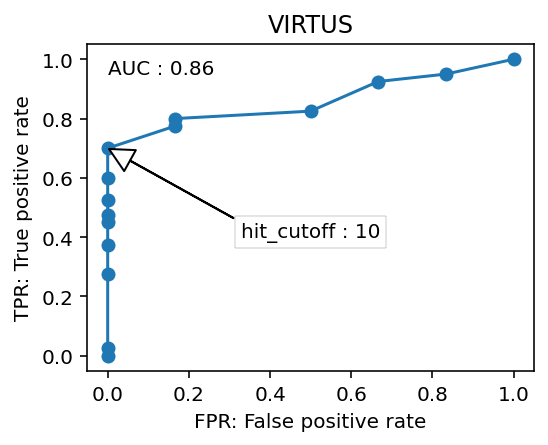

In [11]:
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.annotate('hit_cutoff : 10', xy=(0, 0.7), xytext=(0.5, 0.4),
             bbox=dict(boxstyle='square', fc='white', linewidth=0.1),
             arrowprops=dict(facecolor='white', shrink=0.01, width=0.1), 
             color='k', horizontalalignment='center')
plt.grid(False)
plt.text(0, 0.95 ,'AUC : 0.86')
plt.title('VIRTUS')
plt.savefig('img/ROC_VIRTUS.pdf', bbox_inches='tight')

In [12]:
cutoff = 10

df_virtus_cutoff = df_virtus.copy()
df_virtus_cutoff = df_virtus_cutoff.mask(df_virtus_cutoff < cutoff, 0)
df_virtus_cutoff = df_virtus_cutoff[df_virtus_cutoff.sum(axis=1) > 0]
df_virtus_cutoff = df_virtus_cutoff.drop('NC_022518.1_Human_endogenous_retrovirus_K113_complete_genome')

In [20]:
df_virtus_cutoff.index

Index(['NC_009825.1_Hepatitis_C_virus_genotype_4,_genome',
       'NC_004102.1_Hepatitis_C_virus_genotype_1,_complete_genome',
       'NC_009824.1_Hepatitis_C_virus_genotype_3,_genome',
       'gi|12084981|lcl|HPV71REF.1|_Human_papillomavirus_71_(HPV71),_complete_genome',
       'U13766.1_Murine_leukemia_virus_MCF1233,_complete_genome',
       'AF221065.1_DG-75_Murine_leukemia_virus,_complete_genome',
       'HQ246218.1_Murine_leukemia_virus_N417,_complete_genome',
       'DQ399707.1_Xenotropic_MuLV-related_virus_VP62,_complete_genome',
       'NC_001702.1_Murine_type_C_retrovirus,_complete_genome'],
      dtype='object', name='virus')

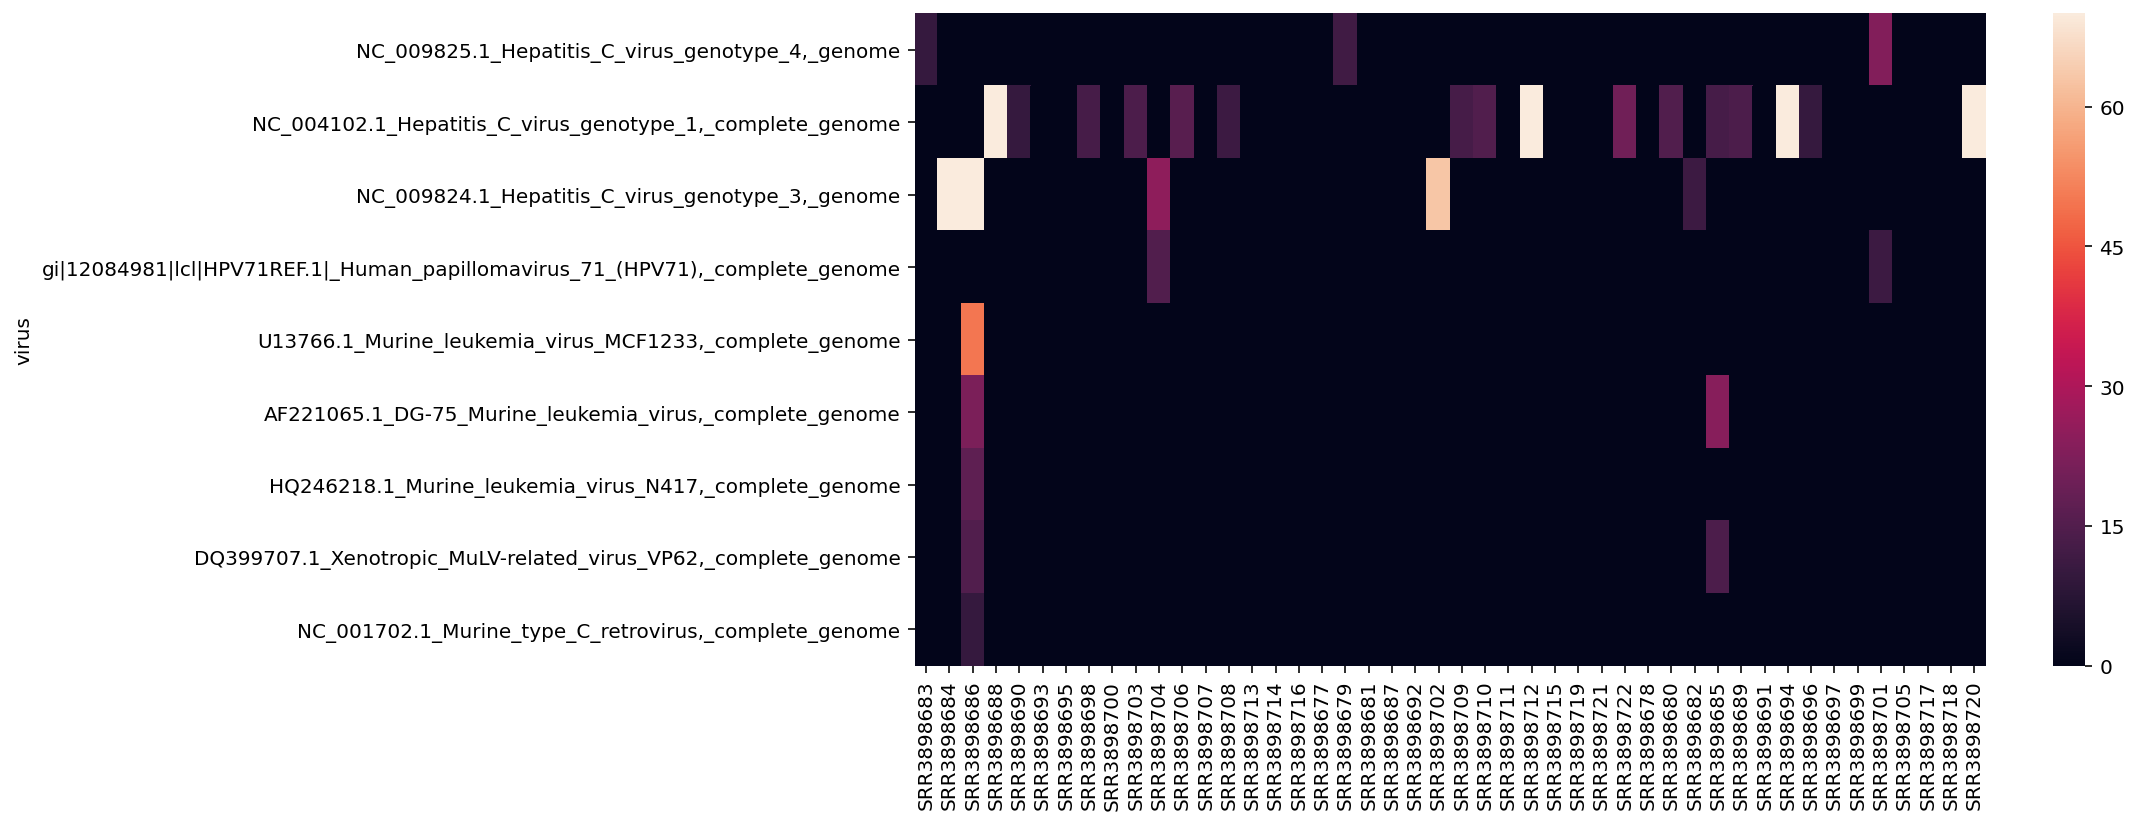

In [21]:
plt.figure(figsize=(12,6))
sns.heatmap(df_virtus_cutoff, vmin=0, vmax=70)
plt.savefig('img/heatmap.VIRTUS.smv.pdf', bbox_inches='tight')

In [13]:
df_virtus.columns

Index(['SRR3898683', 'SRR3898684', 'SRR3898686', 'SRR3898688', 'SRR3898690',
       'SRR3898693', 'SRR3898695', 'SRR3898698', 'SRR3898700', 'SRR3898703',
       'SRR3898704', 'SRR3898706', 'SRR3898707', 'SRR3898708', 'SRR3898713',
       'SRR3898714', 'SRR3898716', 'SRR3898677', 'SRR3898679', 'SRR3898681',
       'SRR3898687', 'SRR3898692', 'SRR3898702', 'SRR3898709', 'SRR3898710',
       'SRR3898711', 'SRR3898712', 'SRR3898715', 'SRR3898719', 'SRR3898721',
       'SRR3898722', 'SRR3898678', 'SRR3898680', 'SRR3898682', 'SRR3898685',
       'SRR3898689', 'SRR3898691', 'SRR3898694', 'SRR3898696', 'SRR3898697',
       'SRR3898699', 'SRR3898701', 'SRR3898705', 'SRR3898717', 'SRR3898718',
       'SRR3898720'],
      dtype='object')

In [23]:
df_p.index

Index(['NC_009825.1_Hepatitis_C_virus_genotype_4,_genome',
       'NC_004102.1_Hepatitis_C_virus_genotype_1,_complete_genome',
       'NC_009824.1_Hepatitis_C_virus_genotype_3,_genome',
       'gi|12084981|lcl|HPV71REF.1|_Human_papillomavirus_71_(HPV71),_complete_genome',
       'U13766.1_Murine_leukemia_virus_MCF1233,_complete_genome',
       'AF221065.1_DG-75_Murine_leukemia_virus,_complete_genome',
       'HQ246218.1_Murine_leukemia_virus_N417,_complete_genome',
       'DQ399707.1_Xenotropic_MuLV-related_virus_VP62,_complete_genome',
       'NC_001702.1_Murine_type_C_retrovirus,_complete_genome'],
      dtype='object', name='virus')

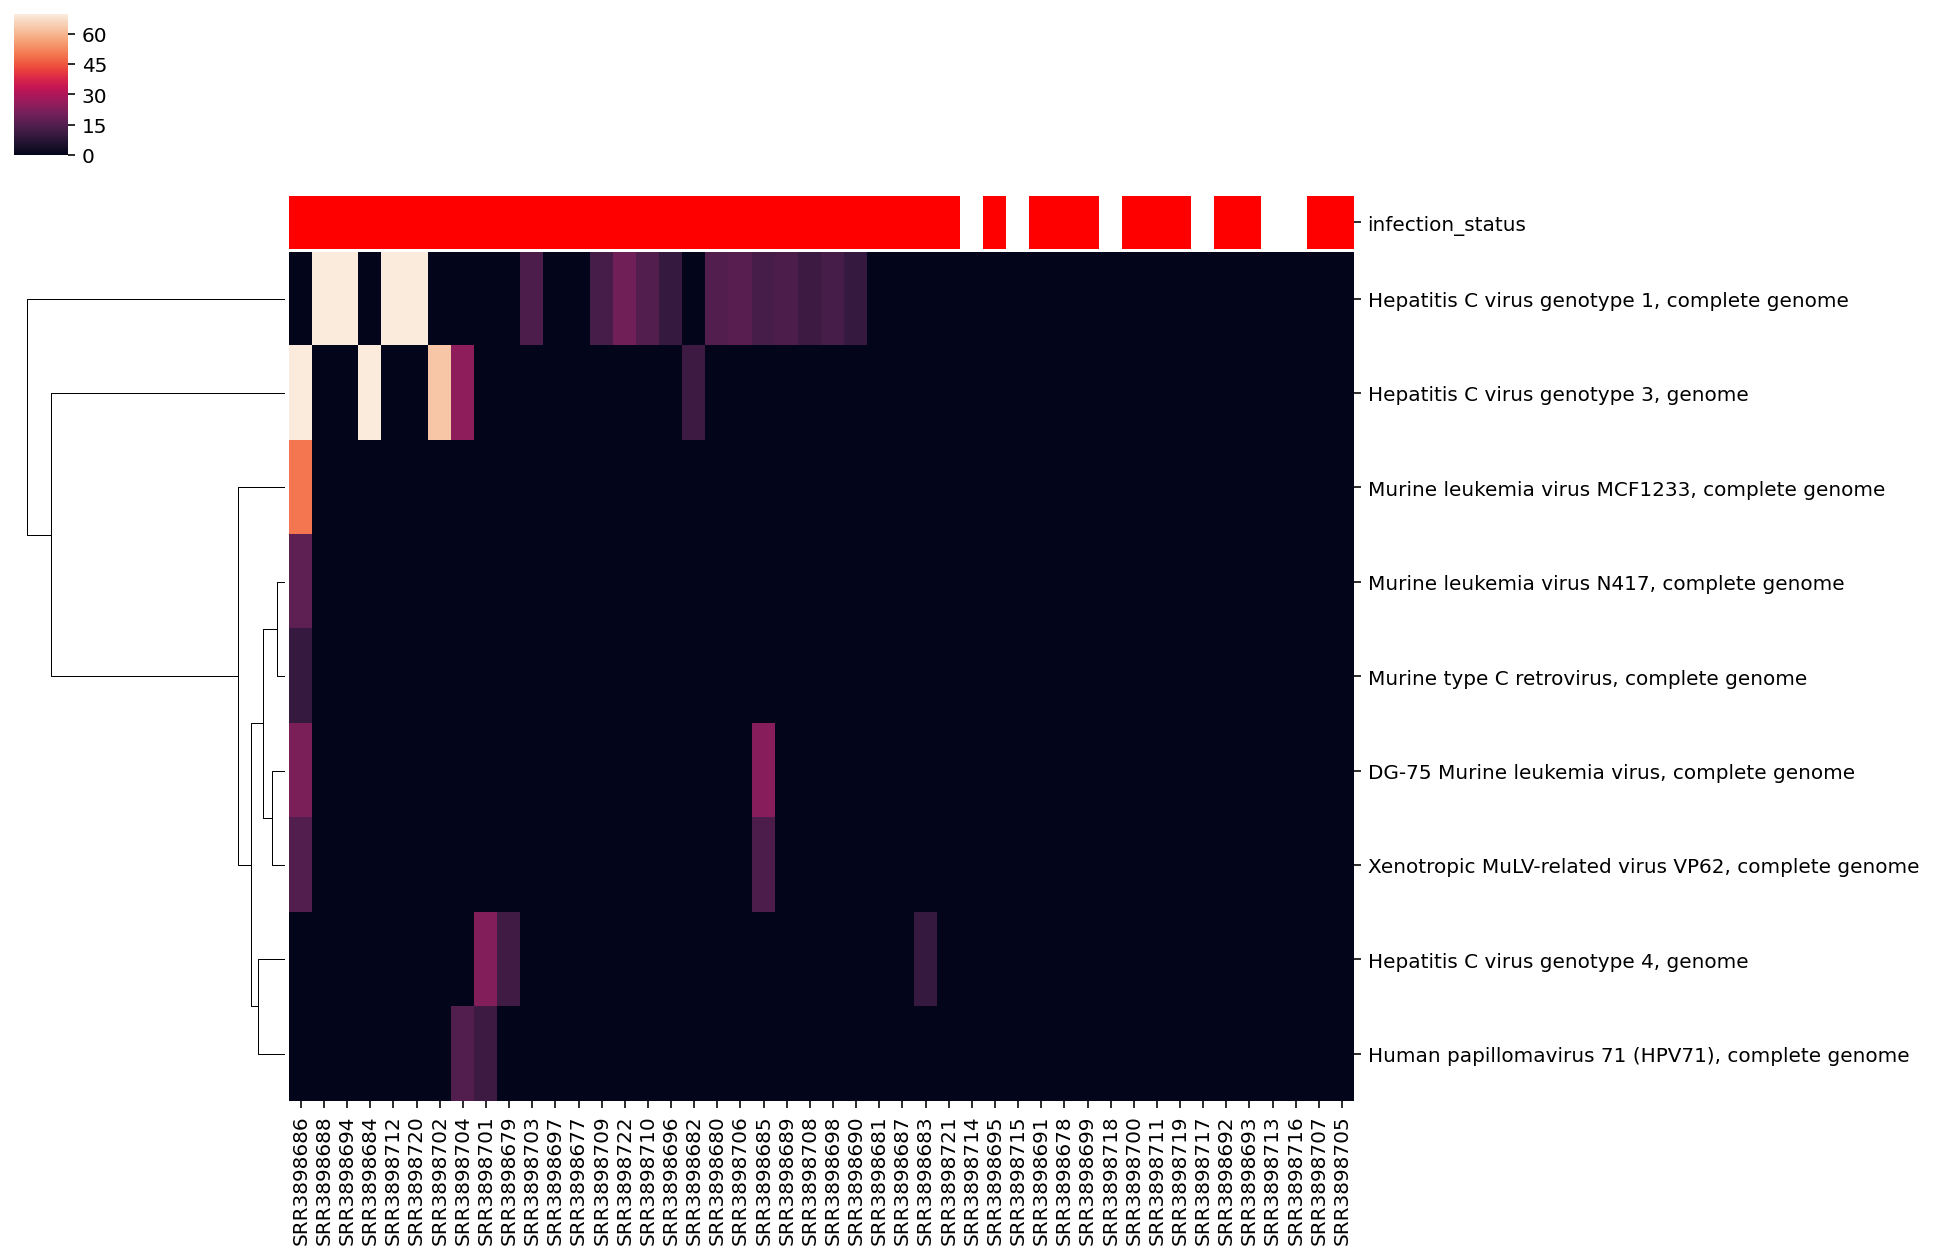

In [24]:
# df_sra.loc[df_virtus.columns, 'infection_status']

lut = dict(zip(['HCV', 'non-HCV'], "rw"))
col_colors = df_sra.loc[df_virtus.columns, 'infection_status'].map(lut)
df_p = df_virtus_cutoff[list(df_virtus_hcv.sum().sort_values(ascending=False).index)]

df_p.index = ['Hepatitis_C_virus_genotype_4,_genome',
       'Hepatitis_C_virus_genotype_1,_complete_genome',
       'Hepatitis_C_virus_genotype_3,_genome',
       'Human_papillomavirus_71_(HPV71),_complete_genome',
       'Murine_leukemia_virus_MCF1233,_complete_genome',
       'DG-75_Murine_leukemia_virus,_complete_genome',
       'Murine_leukemia_virus_N417,_complete_genome',
       'Xenotropic_MuLV-related_virus_VP62,_complete_genome',
       'Murine_type_C_retrovirus,_complete_genome']
df_p.index = [x.replace('_', ' ') for x in df_p.index]

g = sns.clustermap(df_p, 
                   col_cluster=False, col_colors=col_colors, vmin=0, vmax=70, figsize=(12,10))
plt.savefig('img/heatmap.VIRTUS2.smv.pdf', bbox_inches='tight')

In [152]:
pd.DataFrame([fpr, tpr, thresholds])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,0.000,0.000,0.000,0.00,0.000,0.000,0.0,0.0,0.166667,0.166667,0.500,0.666667,0.833333,1.0
1,0.0,0.025,0.275,0.375,0.45,0.475,0.525,0.6,0.7,0.775000,0.800000,0.825,0.925000,0.950000,1.0
2,186.0,185.000,16.000,14.000,13.00,12.000,11.000,10.0,8.0,7.000000,6.000000,5.000,4.000000,3.000000,2.0
